In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from torchvision.utils import save_image
import os

class GrayscaleColorizationDataset(Dataset):
    def __init__(self, grayscale_dir, color_dir, transform=None):
        """
        grayscale_dir: Directory with the grayscale images.
        color_dir: Directory with the color images.
        transform: PyTorch transforms for transforms and tensor conversion.
        """
        self.grayscale_dataset = ImageFolder(grayscale_dir, transform=transform)
        self.color_dataset = ImageFolder(color_dir, transform=transform)
        self.transform = transform

        assert len(self.grayscale_dataset) == len(self.color_dataset), \
            "Mismatched number of images between grayscale and color datasets."

    def __len__(self):
        return len(self.grayscale_dataset)

    def __getitem__(self, idx):
        grayscale_image, _ = self.grayscale_dataset[idx]
        color_image, _ = self.color_dataset[idx]
        return grayscale_image, color_image

def save_colorized_images(model, dataloader, output_dir):
    model.eval()
    os.makedirs(output_dir, exist_ok=True)
    with torch.no_grad():
        for i, (inputs, _) in enumerate(dataloader):
            outputs = model(inputs)
            save_image(outputs, os.path.join(output_dir, f"colorized_{i}.png"))

In [ ]:


from torch.utils.data import DataLoader
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize images to a fixed size.
    transforms.ToTensor(),  # Convert images to PyTorch tensors.
])

training_data = GrayscaleColorizationDataset(
    grayscale_dir=r'/content/drive/MyDrive/dataset/gray_training_set',
    color_dir=r'/content/drive/MyDrive/dataset/training_set',
    transform=transform
)

validation_data = GrayscaleColorizationDataset(
    grayscale_dir=r'/content/drive/MyDrive/dataset/gray_validation_set',
    color_dir=r'/content/drive/MyDrive/dataset/validation_set',
    transform=transform
)

training_loader = DataLoader(training_data, num_workers=0, batch_size=32, shuffle=True)
validation_loader = DataLoader(validation_data, num_workers=0, batch_size=16, shuffle=True)



In [ ]:
import torch
from torch import nn

class BaseColor(nn.Module):
	def __init__(self):
		super(BaseColor, self).__init__()

		self.l_cent = 50.
		self.l_norm = 100.
		self.ab_norm = 110.

	def normalize_l(self, in_l):
		return (in_l-self.l_cent)/self.l_norm

	def unnormalize_l(self, in_l):
		return in_l*self.l_norm + self.l_cent

	def normalize_ab(self, in_ab):
		return in_ab/self.ab_norm

	def unnormalize_ab(self, in_ab):
		return in_ab*self.ab_norm

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
class ECCVGenerator(BaseColor):
    def __init__(self, norm_layer=nn.BatchNorm2d):
        super(ECCVGenerator, self).__init__()

        model1=[nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=True),]
        model1+=[nn.ReLU(True),]
        model1+=[nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1, bias=True),]
        model1+=[nn.ReLU(True),]
        model1+=[norm_layer(64),]

        model2=[nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1, bias=True),]
        model2+=[nn.ReLU(True),]
        model2+=[nn.Conv2d(128, 128, kernel_size=3, stride=2, padding=1, bias=True),]
        model2+=[nn.ReLU(True),]
        model2+=[norm_layer(128),]

        model3=[nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1, bias=True),]
        model3+=[nn.ReLU(True),]
        model3+=[nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=True),]
        model3+=[nn.ReLU(True),]
        model3+=[nn.Conv2d(256, 256, kernel_size=3, stride=2, padding=1, bias=True),]
        model3+=[nn.ReLU(True),]
        model3+=[norm_layer(256),]

        model4=[nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model4+=[nn.ReLU(True),]
        model4+=[nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model4+=[nn.ReLU(True),]
        model4+=[nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model4+=[nn.ReLU(True),]
        model4+=[norm_layer(512),]

        model5=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model5+=[nn.ReLU(True),]
        model5+=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model5+=[nn.ReLU(True),]
        model5+=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model5+=[nn.ReLU(True),]
        model5+=[norm_layer(512),]

        model6=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model6+=[nn.ReLU(True),]
        model6+=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model6+=[nn.ReLU(True),]
        model6+=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model6+=[nn.ReLU(True),]
        model6+=[norm_layer(512),]

        model7=[nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model7+=[nn.ReLU(True),]
        model7+=[nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model7+=[nn.ReLU(True),]
        model7+=[nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model7+=[nn.ReLU(True),]
        model7+=[norm_layer(512),]

        model8=[nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=True),]
        model8+=[nn.ReLU(True),]
        model8+=[nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=True),]
        model8+=[nn.ReLU(True),]
        model8+=[nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=True),]
        model8+=[nn.ReLU(True),]

        model8+=[nn.Conv2d(256, 256, kernel_size=1, stride=1, padding=0, bias=True),]

        self.model1 = nn.Sequential(*model1)
        self.model2 = nn.Sequential(*model2)
        self.model3 = nn.Sequential(*model3)
        self.model4 = nn.Sequential(*model4)
        self.model5 = nn.Sequential(*model5)
        self.model6 = nn.Sequential(*model6)
        self.model7 = nn.Sequential(*model7)
        self.model8 = nn.Sequential(*model8)
        # Additional upsampling to correct size
        self.final_upsample = nn.Upsample(scale_factor=4, mode='bilinear', align_corners=False)

        self.final_conv = nn.Conv2d(256, 3, kernel_size=3, stride=1, padding=1)
        self.final_activation = nn.Tanh()

    def forward(self, input_l):
        conv1_2 = self.model1(self.normalize_l(input_l))
        conv2_2 = self.model2(conv1_2)
        conv3_3 = self.model3(conv2_2)
        conv4_3 = self.model4(conv3_3)
        conv5_3 = self.model5(conv4_3)
        conv6_3 = self.model6(conv5_3)
        conv7_3 = self.model7(conv6_3)
        conv8_3 = self.model8(conv7_3)
        upsampled = self.final_upsample(conv8_3)
        final_out = self.final_conv(upsampled)
        out_tanh = self.final_activation(final_out)
        # Adjust from [-1, 1] to [0, 1] if still needed
        out_adjusted = (out_tanh + 1) / 2
        return out_adjusted

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
print("Torch version:",torch.__version__)
print(torch.cuda.is_available())  # Should return True if CUDA is available
print(torch.version.cuda)          # Should print the CUDA version used by PyTorch
print(torch.cuda.get_device_name(0))

Torch version: 2.2.1+cu121
True
12.1
NVIDIA A100-SXM4-40GB


In [ ]:
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import OneCycleLR

model = ECCVGenerator().cuda()  # Initialize your model
criterion = nn.SmoothL1Loss()
initial_lr = 0.00005
optimizer = torch.optim.Adam(model.parameters(), lr=initial_lr)


num_epochs = 80

scheduler = OneCycleLR(optimizer, max_lr = 0.0001, epochs=num_epochs, steps_per_epoch=len(training_loader))
training_losses = []
validation_losses = []

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    train_loss = 0.0
    train_loader = tqdm(training_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Training]')

    for inputs, targets in train_loader:
        inputs, targets = inputs.cuda(), targets.cuda()
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        scheduler.step()
        train_loss += loss.item()
        train_loader.set_postfix(loss=loss.item())

    avg_train_loss = train_loss / len(training_loader)
    training_losses.append(avg_train_loss)
    print(f'\nEpoch {epoch+1}, Training Loss: {avg_train_loss:.4f}')

    model.eval()  # Set the model to evaluation mode
    validation_loss = 0.0
    validation_loader_tqdm = tqdm(validation_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Validation]')
    with torch.no_grad():
        for inputs, targets in validation_loader_tqdm:
            inputs, targets = inputs.cuda(), targets.cuda()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            validation_loss += loss.item()
            validation_loader_tqdm.set_postfix(loss=loss.item())

    avg_validation_loss = validation_loss / len(validation_loader)
    validation_losses.append(avg_validation_loss)
    print(f'\nEpoch {epoch+1}, Validation Loss: {avg_validation_loss:.4f}')

Epoch 1/80 [Training]:  31%|███▏      | 76/242 [28:23<1:01:26, 22.21s/it, loss=0.0162]/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Epoch 1/80 [Training]: 100%|██████████| 242/242 [1:27:42<00:00, 21.75s/it, loss=0.0104]



Epoch 1, Training Loss: 0.0175


Epoch 1/80 [Validation]: 100%|██████████| 54/54 [11:06<00:00, 12.35s/it, loss=0.00796]



Epoch 1, Validation Loss: 0.0086


Epoch 2/80 [Training]: 100%|██████████| 242/242 [03:53<00:00,  1.04it/s, loss=0.00993]



Epoch 2, Training Loss: 0.0087


Epoch 2/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.92it/s, loss=0.0179]



Epoch 2, Validation Loss: 0.0179


Epoch 3/80 [Training]: 100%|██████████| 242/242 [03:53<00:00,  1.04it/s, loss=0.00991]



Epoch 3, Training Loss: 0.0078


Epoch 3/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.91it/s, loss=0.00439]



Epoch 3, Validation Loss: 0.0072


Epoch 4/80 [Training]: 100%|██████████| 242/242 [03:53<00:00,  1.04it/s, loss=0.00536]



Epoch 4, Training Loss: 0.0071


Epoch 4/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.96it/s, loss=0.00612]



Epoch 4, Validation Loss: 0.0070


Epoch 5/80 [Training]: 100%|██████████| 242/242 [03:53<00:00,  1.04it/s, loss=0.0175]



Epoch 5, Training Loss: 0.0067


Epoch 5/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.99it/s, loss=0.0319]



Epoch 5, Validation Loss: 0.0300


Epoch 6/80 [Training]: 100%|██████████| 242/242 [03:53<00:00,  1.04it/s, loss=0.00938]



Epoch 6, Training Loss: 0.0065


Epoch 6/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.95it/s, loss=0.0735]



Epoch 6, Validation Loss: 0.0666


Epoch 7/80 [Training]: 100%|██████████| 242/242 [03:53<00:00,  1.04it/s, loss=0.00562]



Epoch 7, Training Loss: 0.0062


Epoch 7/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.90it/s, loss=0.0175]



Epoch 7, Validation Loss: 0.0157


Epoch 8/80 [Training]: 100%|██████████| 242/242 [03:53<00:00,  1.04it/s, loss=0.0053]



Epoch 8, Training Loss: 0.0061


Epoch 8/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.97it/s, loss=0.11]



Epoch 8, Validation Loss: 0.1450


Epoch 9/80 [Training]: 100%|██████████| 242/242 [03:53<00:00,  1.04it/s, loss=0.00537]



Epoch 9, Training Loss: 0.0056


Epoch 9/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.94it/s, loss=0.0433]



Epoch 9, Validation Loss: 0.0436


Epoch 10/80 [Training]: 100%|██████████| 242/242 [03:53<00:00,  1.04it/s, loss=0.00753]



Epoch 10, Training Loss: 0.0054


Epoch 10/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  4.00it/s, loss=0.0847]



Epoch 10, Validation Loss: 0.0796


Epoch 11/80 [Training]: 100%|██████████| 242/242 [03:53<00:00,  1.04it/s, loss=0.0115]



Epoch 11, Training Loss: 0.0054


Epoch 11/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.95it/s, loss=0.0132]



Epoch 11, Validation Loss: 0.0145


Epoch 12/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00477]



Epoch 12, Training Loss: 0.0052


Epoch 12/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.88it/s, loss=0.0149]



Epoch 12, Validation Loss: 0.0131


Epoch 13/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00437]



Epoch 13, Training Loss: 0.0050


Epoch 13/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.96it/s, loss=0.0124]



Epoch 13, Validation Loss: 0.0143


Epoch 14/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00316]



Epoch 14, Training Loss: 0.0049


Epoch 14/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.94it/s, loss=0.0162]



Epoch 14, Validation Loss: 0.0185


Epoch 15/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00917]



Epoch 15, Training Loss: 0.0048


Epoch 15/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.96it/s, loss=0.00676]



Epoch 15, Validation Loss: 0.0081


Epoch 16/80 [Training]: 100%|██████████| 242/242 [03:53<00:00,  1.04it/s, loss=0.00549]



Epoch 16, Training Loss: 0.0047


Epoch 16/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.90it/s, loss=0.0157]



Epoch 16, Validation Loss: 0.0170


Epoch 17/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00593]



Epoch 17, Training Loss: 0.0047


Epoch 17/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.90it/s, loss=0.0486]



Epoch 17, Validation Loss: 0.0601


Epoch 18/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00304]



Epoch 18, Training Loss: 0.0044


Epoch 18/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.90it/s, loss=0.0163]



Epoch 18, Validation Loss: 0.0164


Epoch 19/80 [Training]: 100%|██████████| 242/242 [03:53<00:00,  1.04it/s, loss=0.0035]



Epoch 19, Training Loss: 0.0043


Epoch 19/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.95it/s, loss=0.164]



Epoch 19, Validation Loss: 0.1235


Epoch 20/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00382]



Epoch 20, Training Loss: 0.0043


Epoch 20/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.97it/s, loss=0.00559]



Epoch 20, Validation Loss: 0.0062


Epoch 21/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.0066]



Epoch 21, Training Loss: 0.0040


Epoch 21/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.96it/s, loss=0.0205]



Epoch 21, Validation Loss: 0.0178


Epoch 22/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00574]



Epoch 22, Training Loss: 0.0040


Epoch 22/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.94it/s, loss=0.00895]



Epoch 22, Validation Loss: 0.0090


Epoch 23/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00592]



Epoch 23, Training Loss: 0.0039


Epoch 23/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.97it/s, loss=0.0744]



Epoch 23, Validation Loss: 0.0889


Epoch 24/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00245]



Epoch 24, Training Loss: 0.0037


Epoch 24/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.93it/s, loss=0.0358]



Epoch 24, Validation Loss: 0.0355


Epoch 25/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00368]



Epoch 25, Training Loss: 0.0035


Epoch 25/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.99it/s, loss=0.0106]



Epoch 25, Validation Loss: 0.0096


Epoch 26/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00544]



Epoch 26, Training Loss: 0.0034


Epoch 26/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.97it/s, loss=0.0118]



Epoch 26, Validation Loss: 0.0142


Epoch 27/80 [Training]: 100%|██████████| 242/242 [03:51<00:00,  1.05it/s, loss=0.00534]



Epoch 27, Training Loss: 0.0033


Epoch 27/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.98it/s, loss=0.045]



Epoch 27, Validation Loss: 0.0398


Epoch 28/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00365]



Epoch 28, Training Loss: 0.0032


Epoch 28/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.95it/s, loss=0.0576]



Epoch 28, Validation Loss: 0.0516


Epoch 29/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00614]



Epoch 29, Training Loss: 0.0031


Epoch 29/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.96it/s, loss=0.0117]



Epoch 29, Validation Loss: 0.0121


Epoch 30/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00274]



Epoch 30, Training Loss: 0.0030


Epoch 30/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.97it/s, loss=0.0113]



Epoch 30, Validation Loss: 0.0111


Epoch 31/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00399]



Epoch 31, Training Loss: 0.0028


Epoch 31/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.92it/s, loss=0.0207]



Epoch 31, Validation Loss: 0.0193


Epoch 32/80 [Training]: 100%|██████████| 242/242 [03:51<00:00,  1.04it/s, loss=0.00364]



Epoch 32, Training Loss: 0.0028


Epoch 32/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.95it/s, loss=0.00815]



Epoch 32, Validation Loss: 0.0084


Epoch 33/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00194]



Epoch 33, Training Loss: 0.0028


Epoch 33/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.91it/s, loss=0.0435]



Epoch 33, Validation Loss: 0.0387


Epoch 34/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.0039]



Epoch 34, Training Loss: 0.0027


Epoch 34/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.94it/s, loss=0.021]



Epoch 34, Validation Loss: 0.0193


Epoch 35/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00577]



Epoch 35, Training Loss: 0.0027


Epoch 35/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.94it/s, loss=0.0173]



Epoch 35, Validation Loss: 0.0166


Epoch 36/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00301]



Epoch 36, Training Loss: 0.0026


Epoch 36/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.94it/s, loss=0.0181]



Epoch 36, Validation Loss: 0.0166


Epoch 37/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.0031]



Epoch 37, Training Loss: 0.0025


Epoch 37/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.94it/s, loss=0.0084]



Epoch 37, Validation Loss: 0.0061


Epoch 38/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00645]



Epoch 38, Training Loss: 0.0025


Epoch 38/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.94it/s, loss=0.0177]



Epoch 38, Validation Loss: 0.0179


Epoch 39/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00286]



Epoch 39, Training Loss: 0.0025


Epoch 39/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.92it/s, loss=0.0104]



Epoch 39, Validation Loss: 0.0127


Epoch 40/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00233]



Epoch 40, Training Loss: 0.0024


Epoch 40/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.96it/s, loss=0.0156]



Epoch 40, Validation Loss: 0.0156


Epoch 41/80 [Training]: 100%|██████████| 242/242 [03:51<00:00,  1.04it/s, loss=0.00345]



Epoch 41, Training Loss: 0.0023


Epoch 41/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.92it/s, loss=0.00798]



Epoch 41, Validation Loss: 0.0073


Epoch 42/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00296]



Epoch 42, Training Loss: 0.0022


Epoch 42/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.98it/s, loss=0.0216]



Epoch 42, Validation Loss: 0.0188


Epoch 43/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00178]



Epoch 43, Training Loss: 0.0022


Epoch 43/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.92it/s, loss=0.0175]



Epoch 43, Validation Loss: 0.0182


Epoch 44/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00229]



Epoch 44, Training Loss: 0.0022


Epoch 44/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.97it/s, loss=0.0109]



Epoch 44, Validation Loss: 0.0121


Epoch 45/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00195]



Epoch 45, Training Loss: 0.0021


Epoch 45/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.92it/s, loss=0.00487]



Epoch 45, Validation Loss: 0.0050


Epoch 46/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00236]



Epoch 46, Training Loss: 0.0020


Epoch 46/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.91it/s, loss=0.0102]



Epoch 46, Validation Loss: 0.0108


Epoch 47/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00366]



Epoch 47, Training Loss: 0.0021


Epoch 47/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.89it/s, loss=0.011]



Epoch 47, Validation Loss: 0.0123


Epoch 48/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00389]



Epoch 48, Training Loss: 0.0020


Epoch 48/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.94it/s, loss=0.00337]



Epoch 48, Validation Loss: 0.0057


Epoch 49/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.000924]



Epoch 49, Training Loss: 0.0020


Epoch 49/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.92it/s, loss=0.0069]



Epoch 49, Validation Loss: 0.0049


Epoch 50/80 [Training]: 100%|██████████| 242/242 [03:51<00:00,  1.04it/s, loss=0.00298]



Epoch 50, Training Loss: 0.0019


Epoch 50/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.94it/s, loss=0.0134]



Epoch 50, Validation Loss: 0.0117


Epoch 51/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00217]



Epoch 51, Training Loss: 0.0019


Epoch 51/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.97it/s, loss=0.00389]



Epoch 51, Validation Loss: 0.0044


Epoch 52/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.0045]



Epoch 52, Training Loss: 0.0018


Epoch 52/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.94it/s, loss=0.0062]



Epoch 52, Validation Loss: 0.0061


Epoch 53/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00352]



Epoch 53, Training Loss: 0.0018


Epoch 53/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.95it/s, loss=0.00819]



Epoch 53, Validation Loss: 0.0103


Epoch 54/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.004]



Epoch 54, Training Loss: 0.0018


Epoch 54/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.90it/s, loss=0.0115]



Epoch 54, Validation Loss: 0.0108


Epoch 55/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00405]



Epoch 55, Training Loss: 0.0018


Epoch 55/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.93it/s, loss=0.00954]



Epoch 55, Validation Loss: 0.0091


Epoch 56/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00195]



Epoch 56, Training Loss: 0.0018


Epoch 56/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.90it/s, loss=0.00365]



Epoch 56, Validation Loss: 0.0036


Epoch 57/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00303]



Epoch 57, Training Loss: 0.0017


Epoch 57/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.95it/s, loss=0.00556]



Epoch 57, Validation Loss: 0.0049


Epoch 58/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00233]



Epoch 58, Training Loss: 0.0017


Epoch 58/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.94it/s, loss=0.00206]



Epoch 58, Validation Loss: 0.0037


Epoch 59/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00205]



Epoch 59, Training Loss: 0.0017


Epoch 59/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.91it/s, loss=0.00239]



Epoch 59, Validation Loss: 0.0034


Epoch 60/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00333]



Epoch 60, Training Loss: 0.0017


Epoch 60/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.96it/s, loss=0.00931]



Epoch 60, Validation Loss: 0.0073


Epoch 61/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00167]



Epoch 61, Training Loss: 0.0017


Epoch 61/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.98it/s, loss=0.00469]



Epoch 61, Validation Loss: 0.0051


Epoch 62/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00217]



Epoch 62, Training Loss: 0.0016


Epoch 62/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.96it/s, loss=0.00296]



Epoch 62, Validation Loss: 0.0034


Epoch 63/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00192]



Epoch 63, Training Loss: 0.0016


Epoch 63/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.93it/s, loss=0.0031]



Epoch 63, Validation Loss: 0.0048


Epoch 64/80 [Training]: 100%|██████████| 242/242 [03:51<00:00,  1.04it/s, loss=0.00268]



Epoch 64, Training Loss: 0.0016


Epoch 64/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.93it/s, loss=0.00414]



Epoch 64, Validation Loss: 0.0036


Epoch 65/80 [Training]: 100%|██████████| 242/242 [03:51<00:00,  1.04it/s, loss=0.00118]



Epoch 65, Training Loss: 0.0016


Epoch 65/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.93it/s, loss=0.00327]



Epoch 65, Validation Loss: 0.0033


Epoch 66/80 [Training]: 100%|██████████| 242/242 [03:51<00:00,  1.04it/s, loss=0.00269]



Epoch 66, Training Loss: 0.0016


Epoch 66/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.97it/s, loss=0.00229]



Epoch 66, Validation Loss: 0.0034


Epoch 67/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00311]



Epoch 67, Training Loss: 0.0016


Epoch 67/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.95it/s, loss=0.00241]



Epoch 67, Validation Loss: 0.0035


Epoch 68/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00195]



Epoch 68, Training Loss: 0.0015


Epoch 68/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.96it/s, loss=0.00391]



Epoch 68, Validation Loss: 0.0033


Epoch 69/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00189]



Epoch 69, Training Loss: 0.0015


Epoch 69/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.99it/s, loss=0.00306]



Epoch 69, Validation Loss: 0.0035


Epoch 70/80 [Training]: 100%|██████████| 242/242 [03:51<00:00,  1.04it/s, loss=0.00292]



Epoch 70, Training Loss: 0.0015


Epoch 70/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.93it/s, loss=0.00345]



Epoch 70, Validation Loss: 0.0032


Epoch 71/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00187]



Epoch 71, Training Loss: 0.0015


Epoch 71/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.96it/s, loss=0.00431]



Epoch 71, Validation Loss: 0.0032


Epoch 72/80 [Training]: 100%|██████████| 242/242 [03:51<00:00,  1.04it/s, loss=0.00082]



Epoch 72, Training Loss: 0.0015


Epoch 72/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.93it/s, loss=0.00262]



Epoch 72, Validation Loss: 0.0033


Epoch 73/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00189]



Epoch 73, Training Loss: 0.0015


Epoch 73/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.92it/s, loss=0.00468]



Epoch 73, Validation Loss: 0.0031


Epoch 74/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00127]



Epoch 74, Training Loss: 0.0015


Epoch 74/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  4.00it/s, loss=0.0048]



Epoch 74, Validation Loss: 0.0035


Epoch 75/80 [Training]: 100%|██████████| 242/242 [03:51<00:00,  1.04it/s, loss=0.00163]



Epoch 75, Training Loss: 0.0015


Epoch 75/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.99it/s, loss=0.00547]



Epoch 75, Validation Loss: 0.0032


Epoch 76/80 [Training]: 100%|██████████| 242/242 [03:51<00:00,  1.04it/s, loss=0.00271]



Epoch 76, Training Loss: 0.0015


Epoch 76/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.94it/s, loss=0.00248]



Epoch 76, Validation Loss: 0.0032


Epoch 77/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00113]



Epoch 77, Training Loss: 0.0015


Epoch 77/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.93it/s, loss=0.00299]



Epoch 77, Validation Loss: 0.0031


Epoch 78/80 [Training]: 100%|██████████| 242/242 [03:51<00:00,  1.04it/s, loss=0.00111]



Epoch 78, Training Loss: 0.0015


Epoch 78/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.92it/s, loss=0.00346]



Epoch 78, Validation Loss: 0.0031


Epoch 79/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.0022]



Epoch 79, Training Loss: 0.0015


Epoch 79/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  3.97it/s, loss=0.0032]



Epoch 79, Validation Loss: 0.0031


Epoch 80/80 [Training]: 100%|██████████| 242/242 [03:52<00:00,  1.04it/s, loss=0.00122]



Epoch 80, Training Loss: 0.0015


Epoch 80/80 [Validation]: 100%|██████████| 54/54 [00:13<00:00,  4.00it/s, loss=0.00213]


Epoch 80, Validation Loss: 0.0031


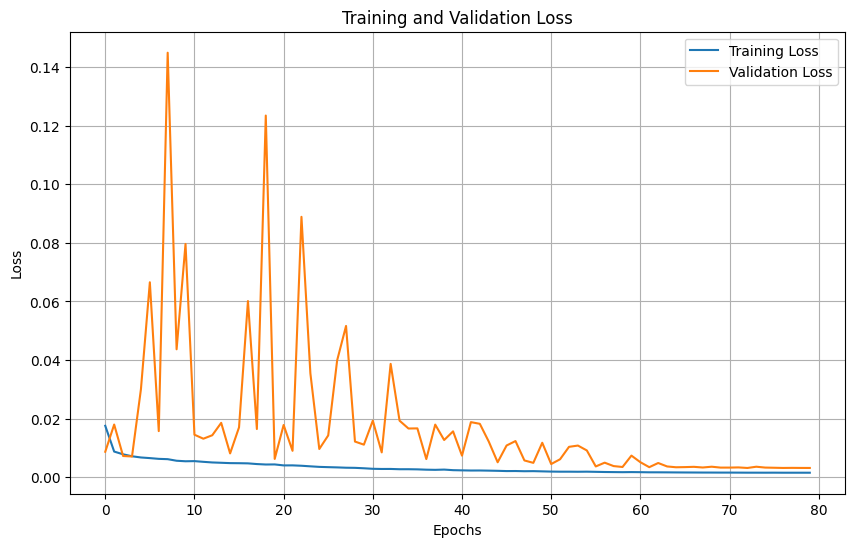

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

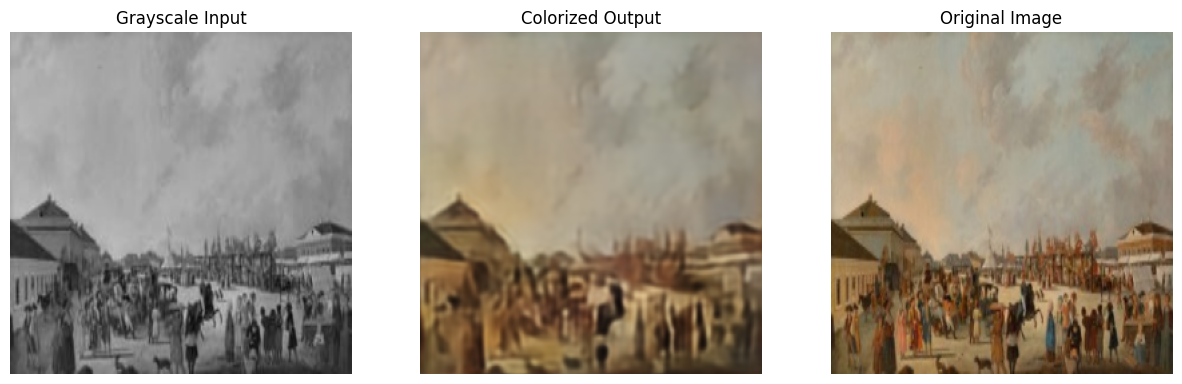

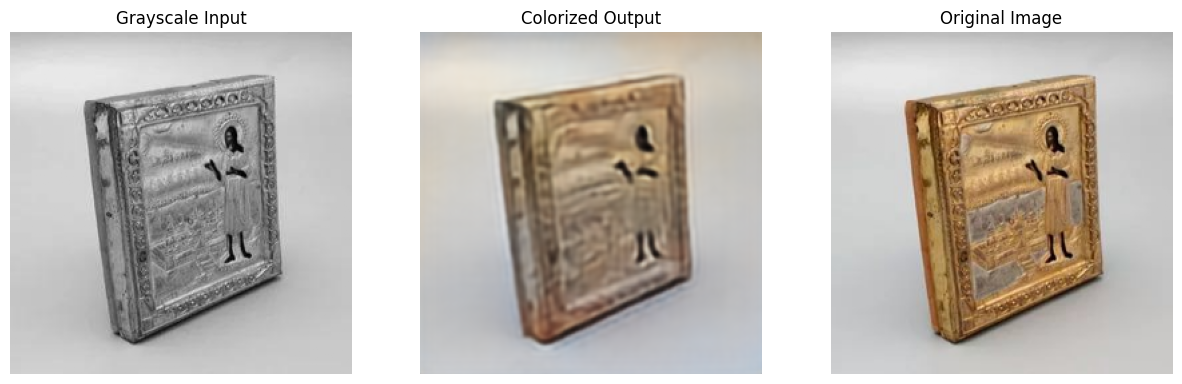

In [ ]:
def visualize_results(grayscale, colorized, original):
    """
    Visualize grayscale input, colorized output, and the original color image.
    """
    with torch.no_grad():
        # Convert to numpy arrays
        grayscale = grayscale.cpu().numpy().transpose((1, 2, 0))
        colorized = colorized.cpu().numpy().transpose((1, 2, 0))
        original = original.cpu().numpy().transpose((1, 2, 0))

        # Plot
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))
        ax[0].imshow(grayscale, cmap='gray')
        ax[0].set_title("Grayscale Input")
        ax[0].axis("off")

        ax[1].imshow(colorized)
        ax[1].set_title("Colorized Output")
        ax[1].axis("off")

        ax[2].imshow(original)
        ax[2].set_title("Original Image")
        ax[2].axis("off")

        plt.show()

# Assuming `model`, `validation_loader` are already defined and ready to use
model.eval()
with torch.no_grad():
    # Get a batch from the validation set
    grayscale_inputs, original_colors = next(iter(validation_loader))
    grayscale_inputs, original_colors = grayscale_inputs.cuda(), original_colors.cuda()

    # Generate colorized outputs
    colorized_outputs = model(grayscale_inputs)

    # Visualize the results for the first image in the batch
    visualize_results(grayscale_inputs[1], colorized_outputs[1], original_colors[1])
    visualize_results(grayscale_inputs[10], colorized_outputs[10], original_colors[10])

In [ ]:
model_path = r'/content/drive/MyDrive/DS_301_Project_Group_1_Picture_Colorization/model/artifact/vgg-16_loss=SmoothL1_batch32_OneCycleLR/model_state_dict.pth'
torch.save(model.state_dict(), model_path)

In [ ]:
import csv

# Specify the path to the CSV file where you want to save the losses
csv_file_path = model_path+'losses.csv'

# Open the file in write mode
with open(csv_file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    # Write the headers
    writer.writerow(['Epoch', 'Training Loss', 'Validation Loss'])

    # Write the losses for each epoch
    for epoch in range(num_epochs):
        writer.writerow([epoch + 1, training_losses[epoch], validation_losses[epoch]])

print(f"Losses saved to {csv_file_path}")

Losses saved to /content/drive/MyDrive/DS_301_Project_Group_1_Picture_Colorization/model/artifact/vgg-16_loss=SmoothL1_batch32_OneCycleLR/model_state_dict.pthlosses.csv


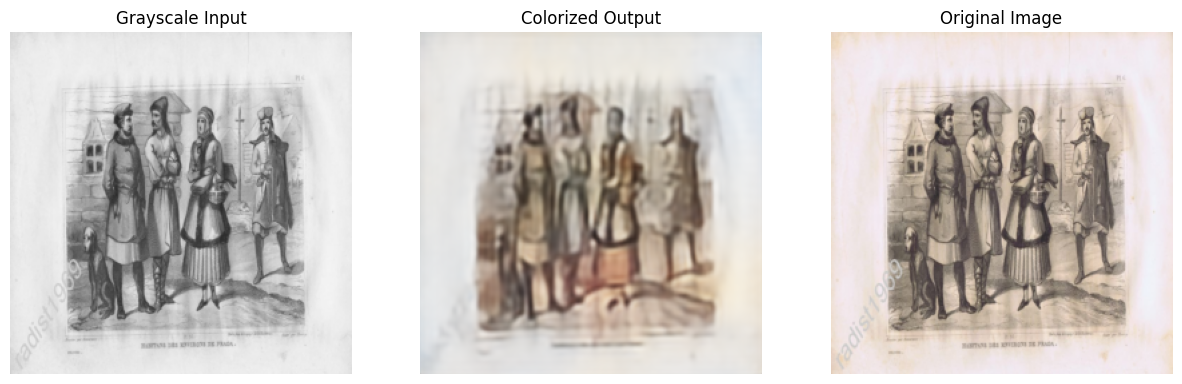

In [ ]:
model = ECCVGenerator().cuda()  # Or just ECCVGenerator() if not using CUDA

# Load the weights back
model.load_state_dict(torch.load(model_path))

# Don't forget to call model.eval() if you're in inference mode
model.eval()
with torch.no_grad():
    # Get a batch from the validation set
    grayscale_inputs, original_colors = next(iter(validation_loader))
    grayscale_inputs, original_colors = grayscale_inputs.cuda(), original_colors.cuda()

    # Generate colorized outputs
    colorized_outputs = model(grayscale_inputs)

    # Visualize the results for the first image in the batch
    visualize_results(grayscale_inputs[5], colorized_outputs[5], original_colors[5])